Successfully retrieved data for GDP
Successfully retrieved data for Unemployment Rate
Successfully retrieved data for Consumer Price Index
Successfully retrieved data for Industrial Production Index


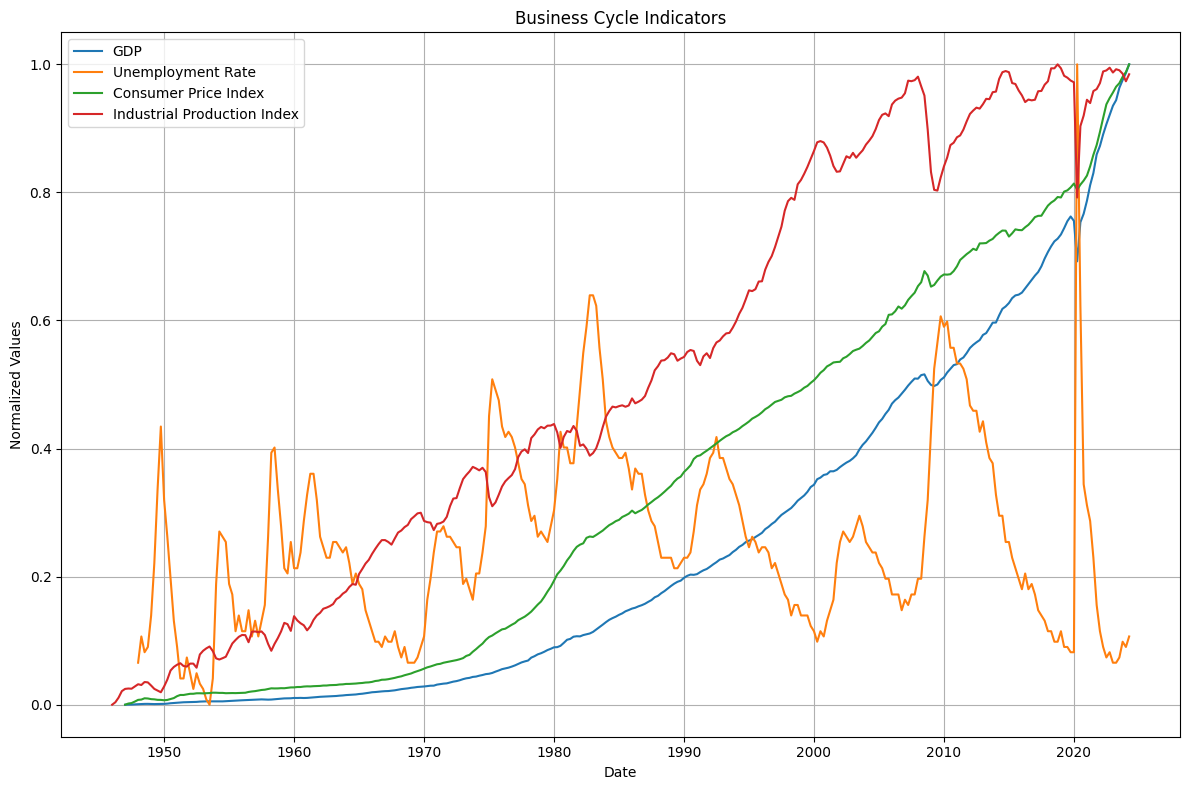

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
import datetime

# Replace with your FRED API Key
fred = Fred(api_key='bd48e38ca6b466442ca3eb2dacfa4aa2')

# Define the updated indicators to pull data for
indicators = {
    "GDP": "GDP",  # Gross Domestic Product
    "Unemployment Rate": "UNRATE",  # Unemployment Rate
    "Consumer Price Index": "CPIAUCSL",  # Consumer Price Index for All Urban Consumers
    "Industrial Production Index": "INDPRO",  # Industrial Production Index
}

# Define time range
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime.now()

# Create an empty DataFrame to store the results
data = pd.DataFrame()

# Pull the data from FRED API and handle errors for unavailable series
for name, series_id in indicators.items():
    try:
        # Attempt to retrieve the data
        data[name] = fred.get_series(series_id, start_date=start_date, end_date=end_date)
        print(f"Successfully retrieved data for {name}")
    except Exception as e:
        # Print error message and skip the series if it fails
        print(f"Error retrieving data for {name}: {e}")
        continue

# Check if data is not empty before plotting
if not data.empty:
    # Normalize data for better comparison (if you want all indicators on the same scale)
    data_normalized = (data - data.min()) / (data.max() - data.min())

    # Create a plot for the first group of indicators
    plt.figure(figsize=(12, 8))

    # Plot the first group of indicators
    for column in data_normalized.columns:
        plt.plot(data_normalized.index, data_normalized[column], label=column)

    # Add title, labels, and legend
    plt.title("Business Cycle Indicators")
    plt.xlabel("Date")
    plt.ylabel("Normalized Values")
    plt.legend(loc='best')
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.show()
else:
    print("No data available to plot.")


Commentary on the Chart:
GDP (Gross Domestic Product):

Description: GDP measures the total economic output of a country and serves as the broadest indicator of economic health.
Interpretation: A rising GDP typically signals economic growth, while a decline may suggest a recession. In the chart, we expect GDP to show periods of steady growth, occasionally interrupted by sharp declines during economic downturns, such as during recessions (e.g., 2008 or 2020 during COVID-19).
Unemployment Rate:

Description: The unemployment rate reflects the percentage of the labor force that is unemployed and actively seeking work.
Interpretation: The unemployment rate is counter-cyclical, meaning it tends to increase during economic downturns and decrease during periods of economic expansion. Peaks in the unemployment rate would typically lag declines in GDP, as labor markets usually take time to react to changes in economic conditions.
Expected Trend: In the chart, you should see an inverse relationship between the unemployment rate and GDP—when GDP drops during a recession, the unemployment rate tends to spike shortly thereafter.
Consumer Price Index (CPI):

Description: CPI measures the overall change in consumer prices and serves as a key indicator of inflation.
Interpretation: A rising CPI indicates inflationary pressures in the economy, while a decrease could signal deflation. When the economy is expanding (rising GDP), moderate inflation is expected. However, excessively high CPI levels can lead to concerns about inflation overheating. During recessions, inflation often declines as consumer demand weakens.
Expected Trend: In the chart, a rising CPI should generally follow periods of GDP growth, though severe shocks to demand (such as recessions) might cause temporary drops in inflation.
Industrial Production Index (IPI):

Description: IPI measures the output of the manufacturing, mining, and utilities sectors, providing insights into the industrial side of the economy.

Interpretation: Like GDP, IPI is pro-cyclical. An increasing IPI signals expansion in industrial activity, while a drop indicates contractions in industrial production. IPI tends to respond more quickly than GDP to shifts in economic conditions, particularly during recessions.
Expected Trend: In the chart, you’ll likely see IPI falling before or during economic downturns, and rebounding ahead of GDP recovery as industries ramp up production in anticipation of renewed demand.

Comparative Analysis:
Relationship Between GDP and IPI: IPI tends to be a leading indicator for GDP as changes in industrial production are often one of the first signs of economic shifts. For example, a fall in IPI often precedes a decline in GDP.

Unemployment vs. GDP: Since the unemployment rate lags GDP, expect to see the unemployment rate peaking after major GDP declines, such as during financial crises or recessions.
CPI and Economic Cycles: During expansion phases, the CPI should rise moderately in tandem with GDP and industrial production. However, sharp downturns in GDP might lead to lower inflation (or even deflation) as demand weakens.

Real-World Examples:
COVID-19 Recession (2020): You might observe a sharp drop in GDP and IPI during early 2020, with a lagged spike in the unemployment rate and a temporary drop in CPI as demand collapsed. The recovery in these indicators might also show how fast industrial production and GDP bounced back in comparison to the labor market.
2008 Financial Crisis: Similarly, in the aftermath of the 2008 financial crisis, we would expect to see GDP and IPI falling in 2008-2009, followed by rising unemployment and a dip in CPI as the economy slowed down.

Conclusion:
The chart, with its normalized data, provides a clear, comparative view of how different key economic indicators move during various stages of the business cycle. It visually highlights the relationships between GDP, unemployment, inflation, and industrial production, allowing you to assess the dynamics of economic growth, labor market conditions, and inflationary pressures over time.